<a href="https://colab.research.google.com/github/KhandareAshutosh/Stock_Market_Analysis/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Market Analysis 📈 + Prediction using LSTM**

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stocks used for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis = 0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-21,125.639999,126.730003,123.849998,124.830002,124.830002,52137700,AMAZON
2023-06-22,125.309998,130.330002,125.139999,130.149994,130.149994,90354600,AMAZON
2023-06-23,129.110001,130.839996,128.279999,129.330002,129.330002,71855200,AMAZON
2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300,AMAZON
2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000,AMAZON
2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500,AMAZON
2023-06-29,128.770004,129.259995,127.260002,127.900002,127.900002,40761000,AMAZON
2023-06-30,129.470001,131.250000,128.949997,130.360001,130.360001,54310500,AMAZON
2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800,AMAZON


**Quick note**: Using globals() is a sloppy way of setting the DataFrame names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.[link text](https://)

In [3]:
# Summary stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,155.506774,157.371873,153.948048,155.789721,155.367995,7.194344e+07
std,14.913183,14.707645,15.235339,15.020026,15.132924,2.257134e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,3.145820e+07
25%,145.084999,147.029999,143.165001,145.449997,145.000954,5.547655e+07
50%,152.740005,154.580002,150.910004,153.039993,152.658844,6.844560e+07
75%,165.904999,167.300003,164.459999,165.970001,165.481110,8.161725e+07
max,193.779999,194.479996,191.759995,193.970001,193.970001,1.647624e+08


In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-06 to 2023-07-05
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


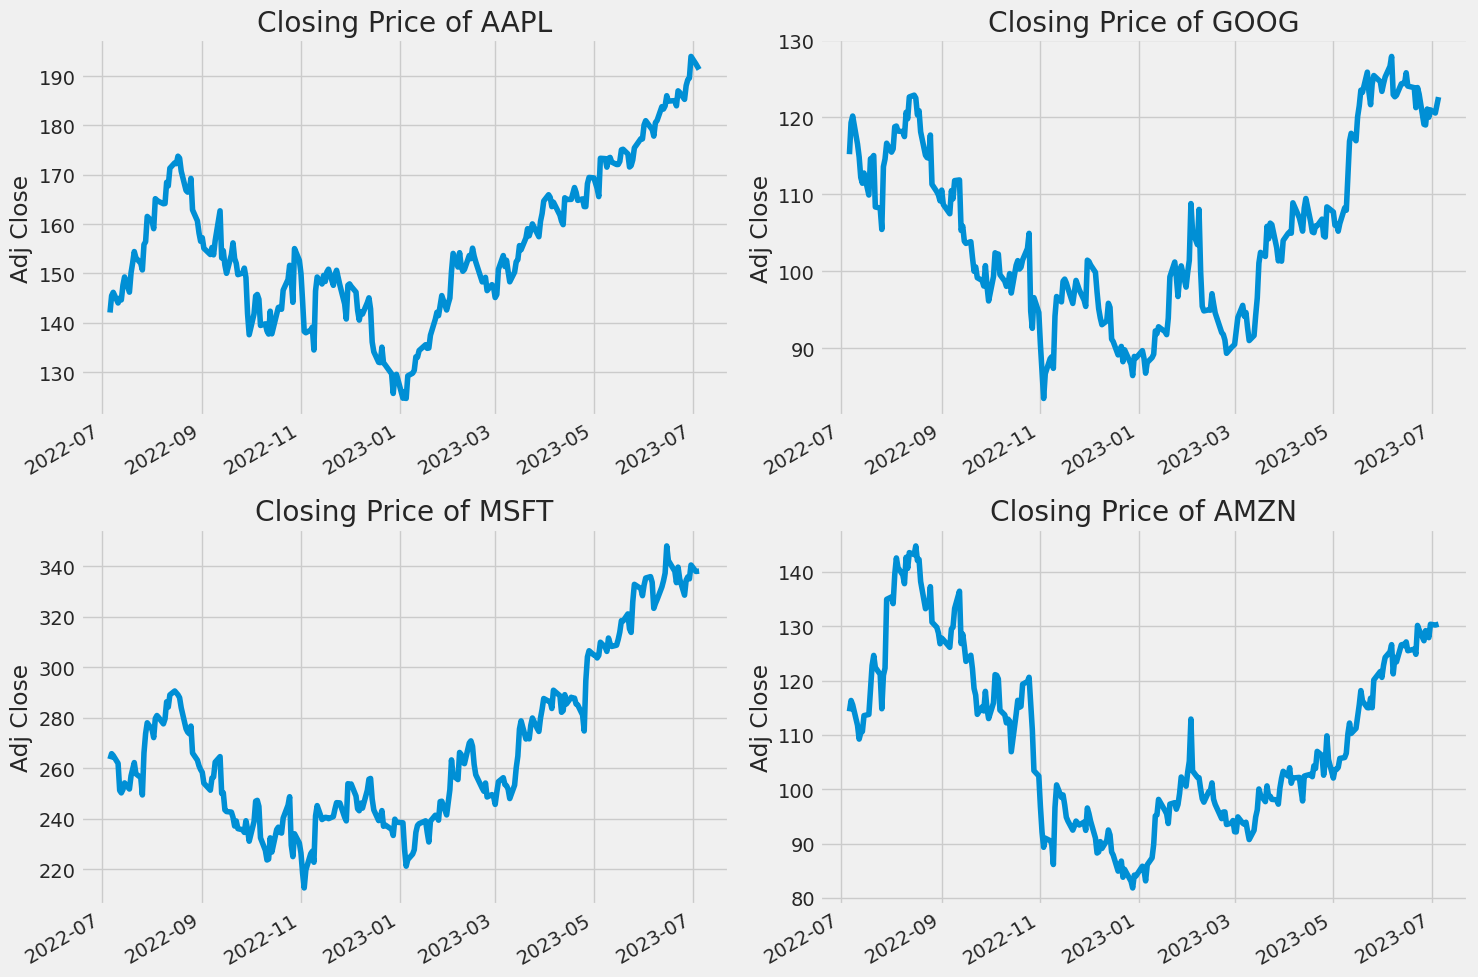

In [5]:
# Let's have a historical view of the closing price
plt.figure(figsize = (15,10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")

plt.tight_layout()


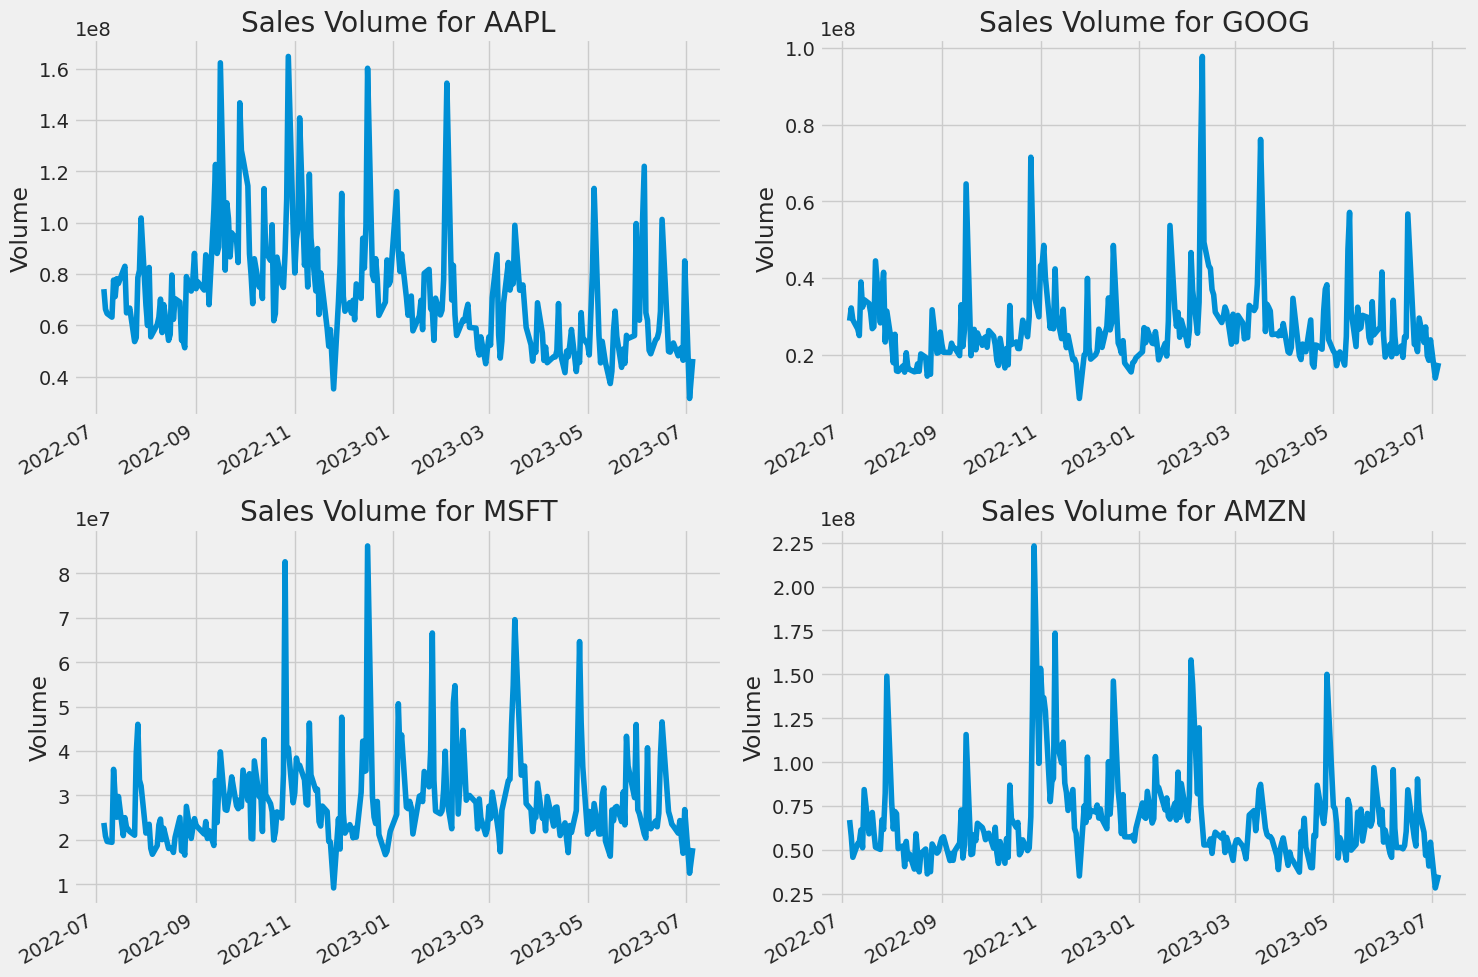

In [6]:
# Now let's plot the total volume of the stock being traded each day

plt.figure(figsize = (15,10))
plt.subplots_adjust( top = 1.25, bottom = 1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i-1]}")

plt.tight_layout()

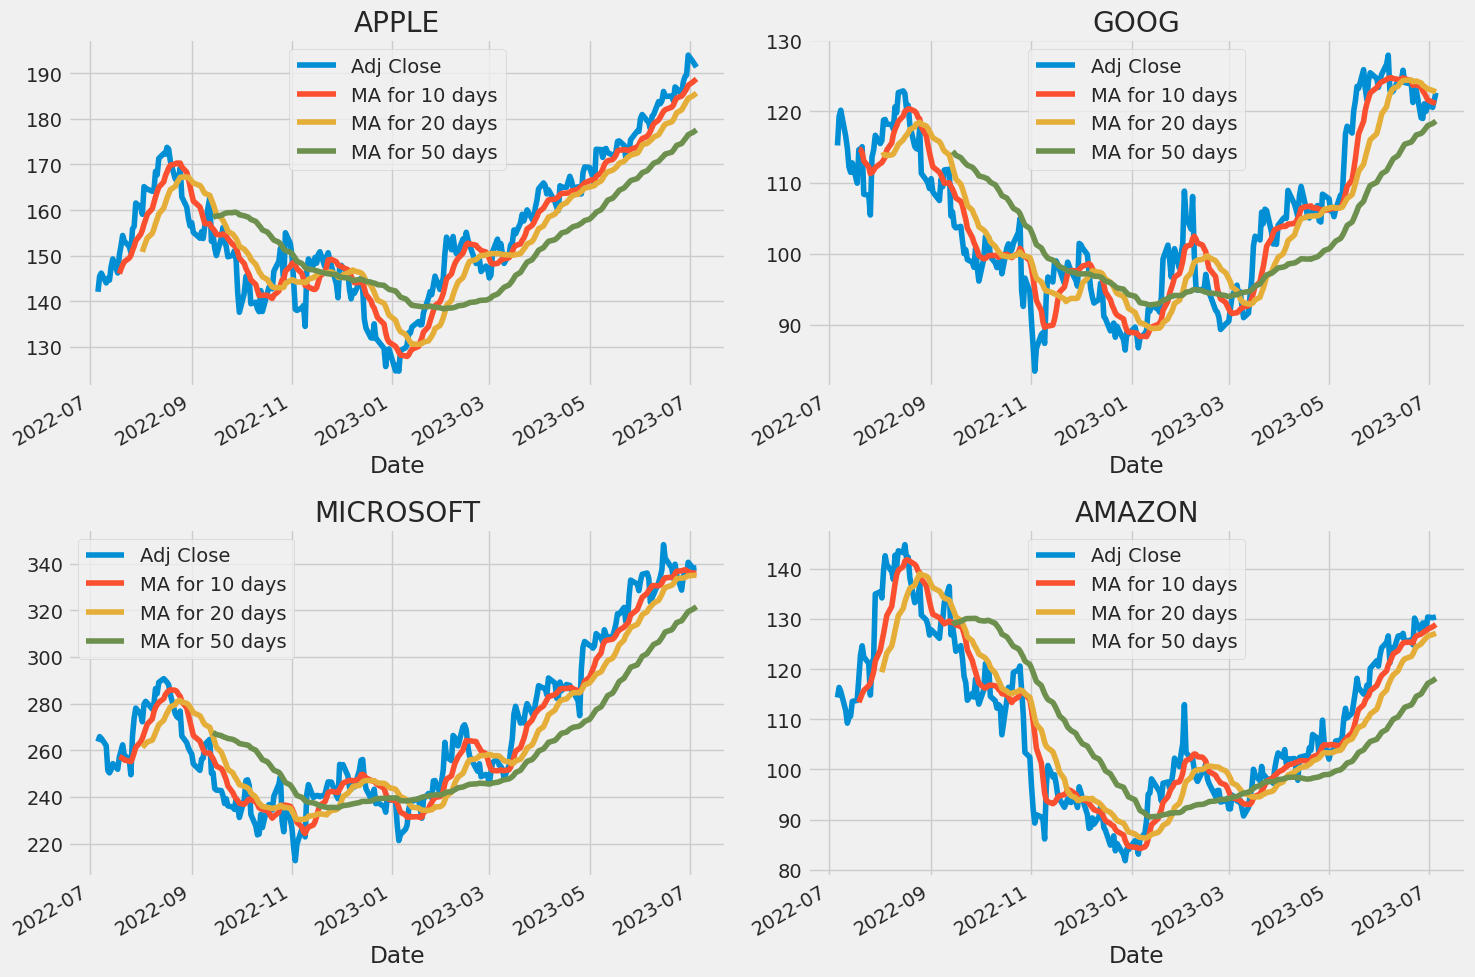

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,1])
axes[0,1].set_title('GOOG')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

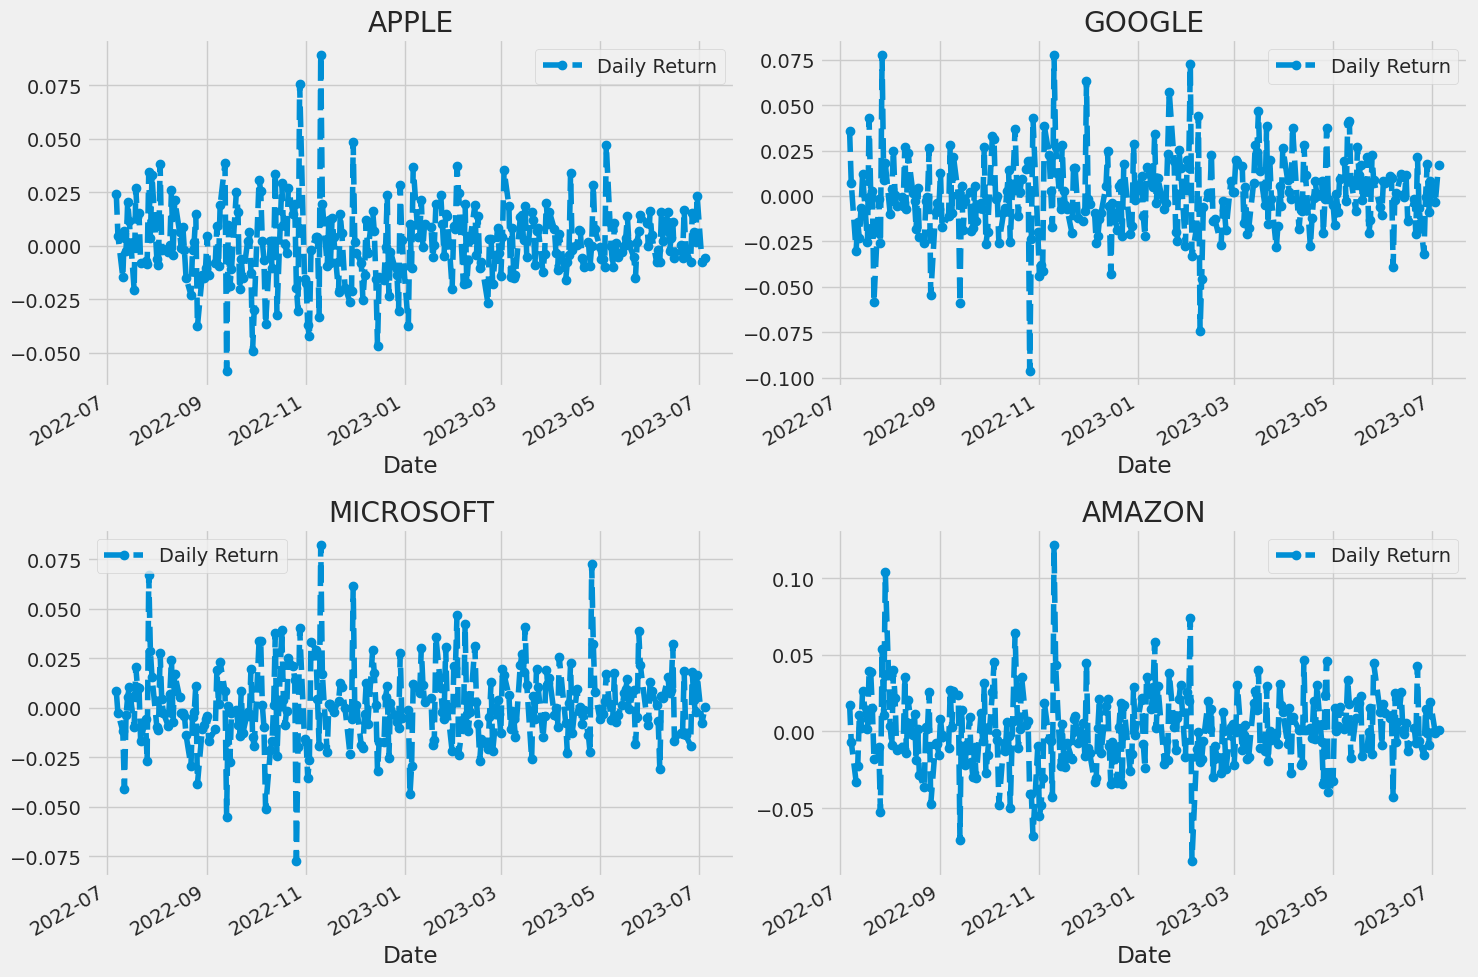

In [8]:
# We'll use pct_change to find the percentage change for each day

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Now plotting the daily return percentage
fig, axes = plt.subplots(nrows = 2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax= axes[0,0], legend = True, linestyle = '--', marker = 'o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax = axes[0,1], legend = True, linestyle = '--', marker = 'o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax = axes[1,0], legend = True, linestyle = '--', marker = 'o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax = axes[1,1], legend = True, linestyle = '--', marker = 'o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

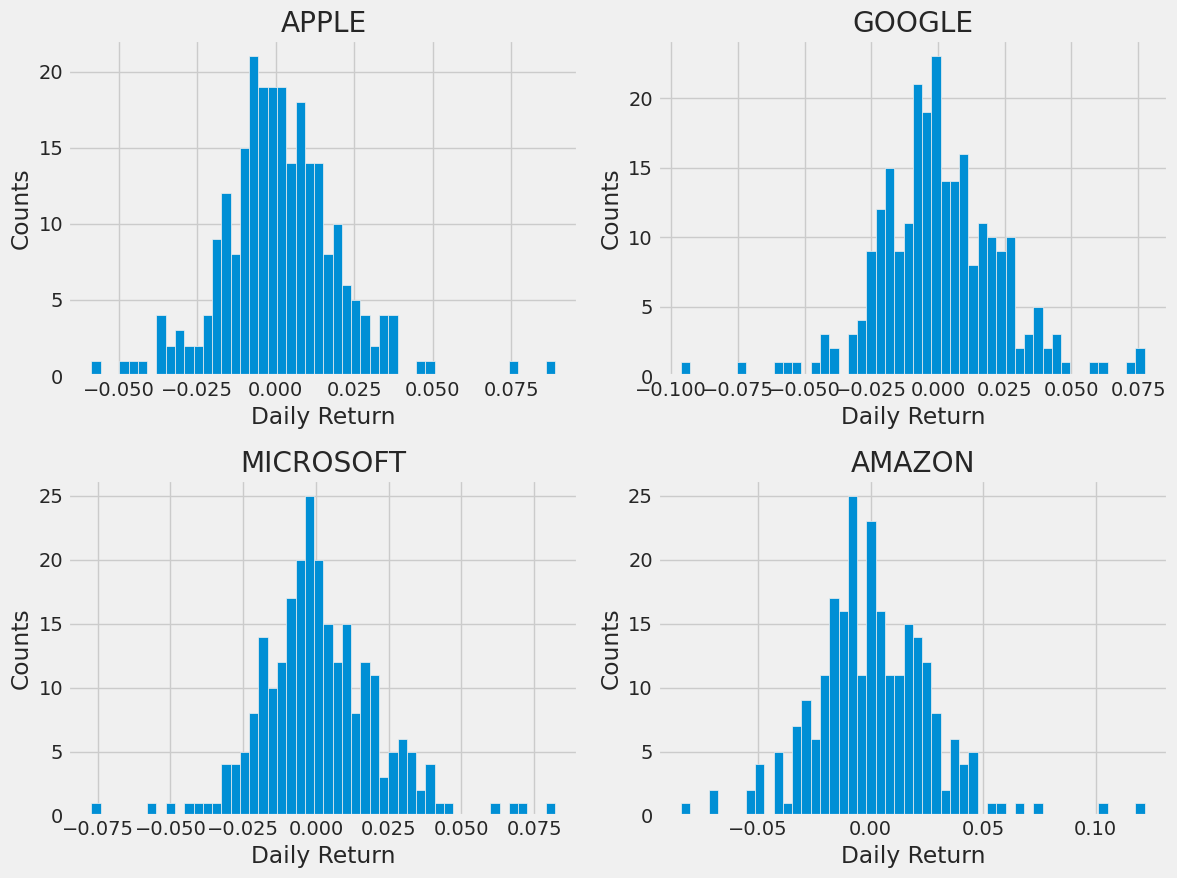

In [9]:
plt.figure(figsize = (12,9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins = 50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')

plt.tight_layout()

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start = start, end = end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-07-06,NaN,NaN,NaN,NaN
2022-07-07,0.023999,0.017493,0.035521,0.008227
2022-07-08,0.004715,-0.006791,0.007229,-0.002757
2022-07-11,-0.014758,-0.032803,-0.030341,-0.011769
2022-07-12,0.006834,-0.022640,-0.014358,-0.040982


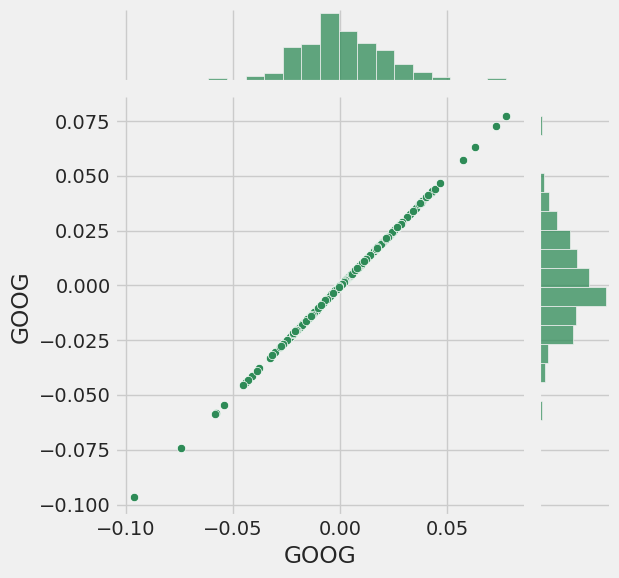

In [11]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x= 'GOOG', y= 'GOOG', data = tech_rets, kind = 'scatter', color = 'seagreen')

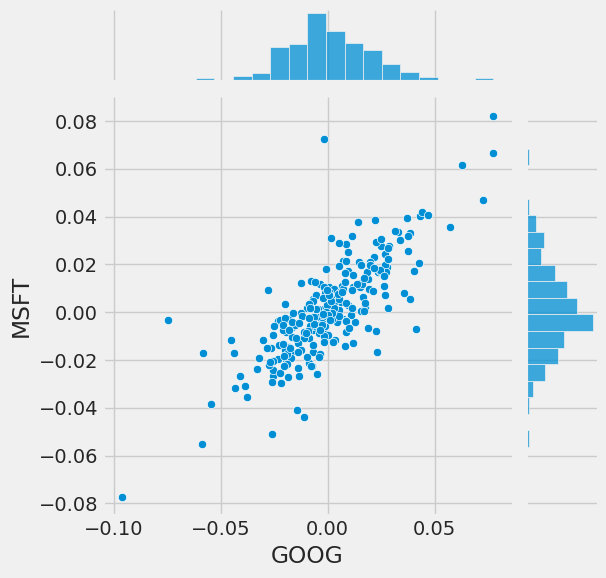

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x = 'GOOG', y='MSFT', data = tech_rets, kind = 'scatter')

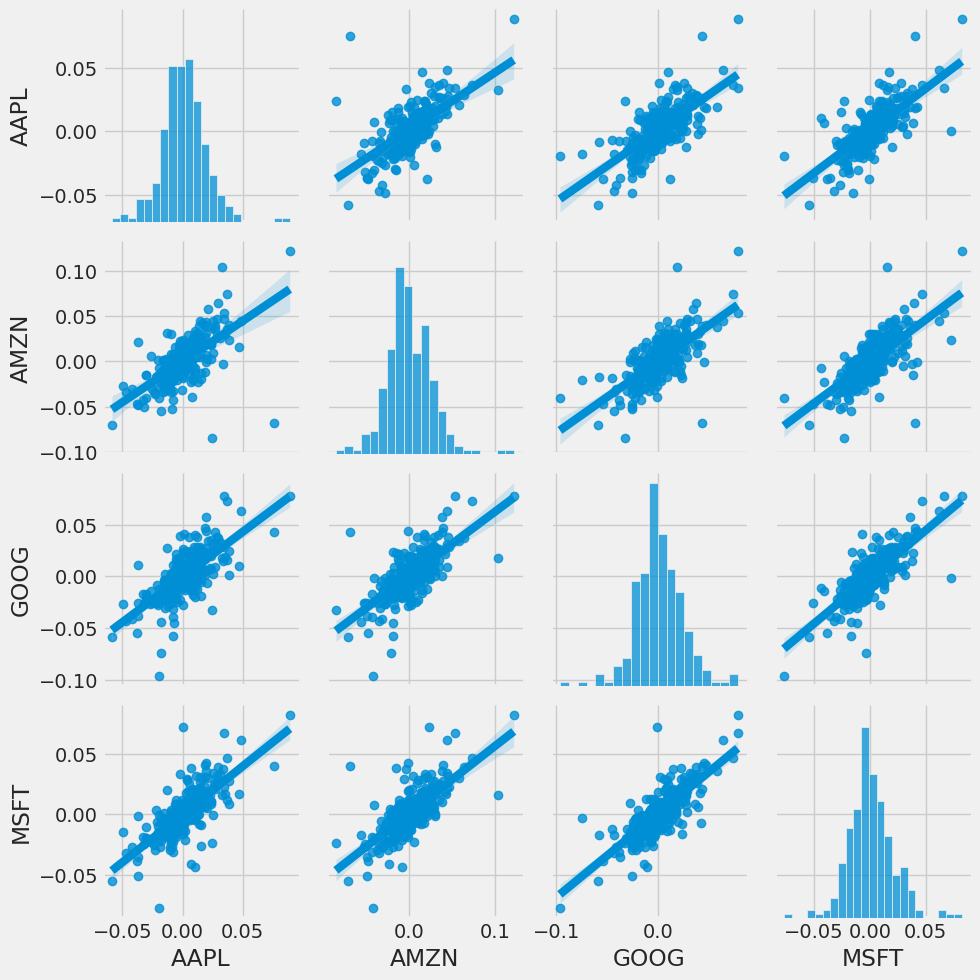

In [13]:
# We can simply call pairplot on our platform on our DataFrame for an automatic visual analysis of all comparisons

sns.pairplot(tech_rets, kind = 'reg')

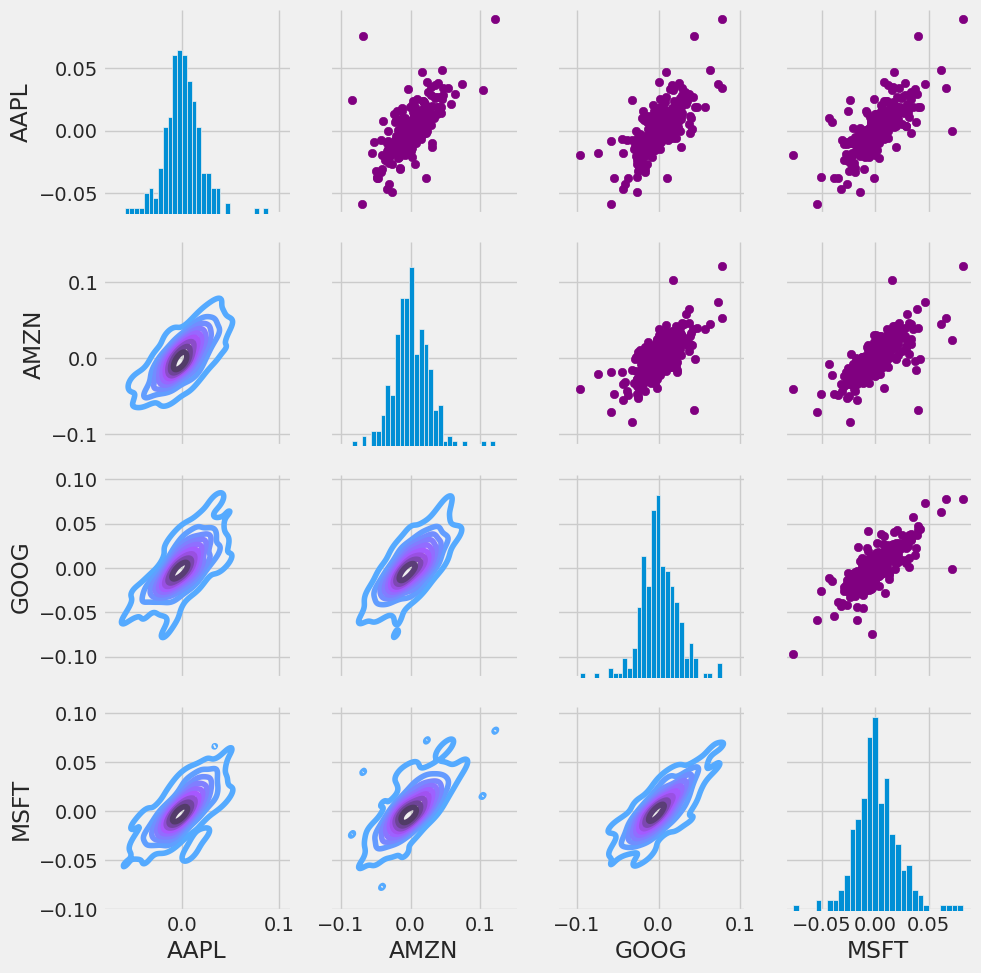

In [14]:
# Set up our figure by naming it returns_fig, call PairPlot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like
return_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, including the plot type(kde) or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins = 30)

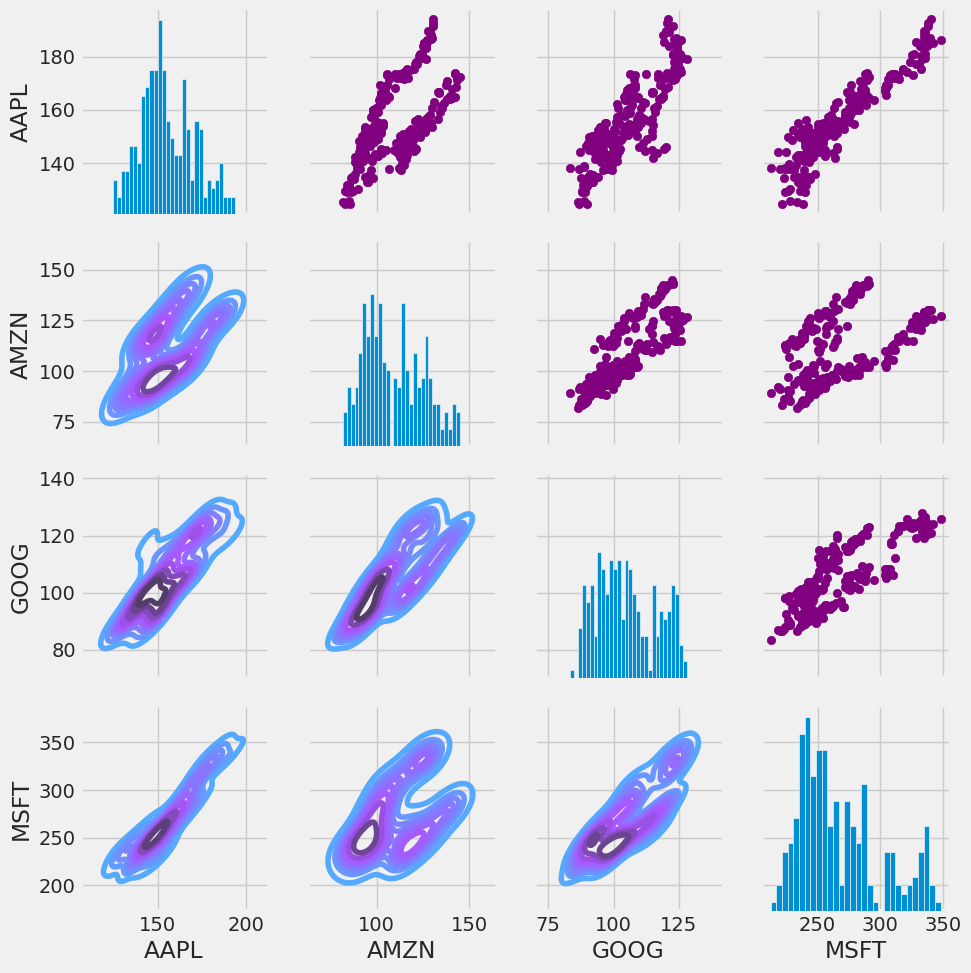

In [15]:
# set up our figure by naming it returns_fig, call PairPlot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like
returns_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, incliuding the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins = 30)


Text(0.5, 1.0, 'Correlation of stock closing price')

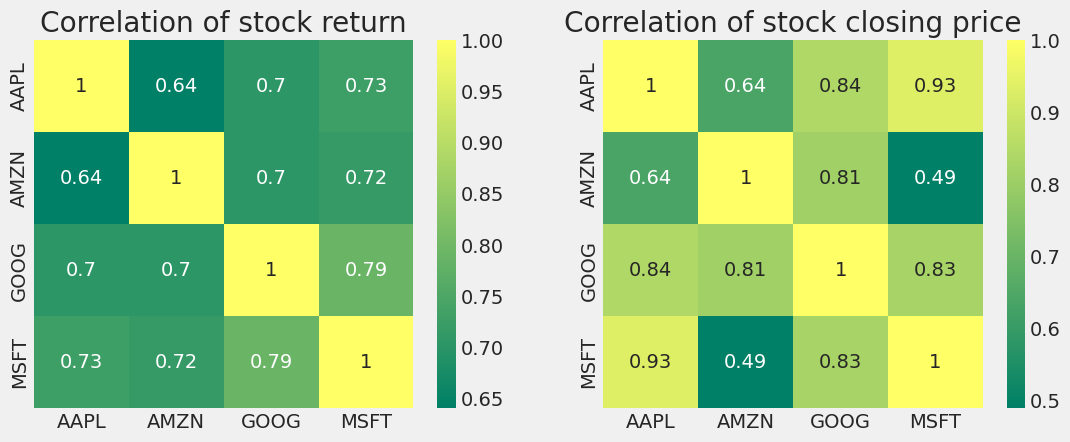

In [16]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot = True, cmap = 'summer')
plt.title('Correlation of stock return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot = True, cmap = 'summer')
plt.title('Correlation of stock closing price')

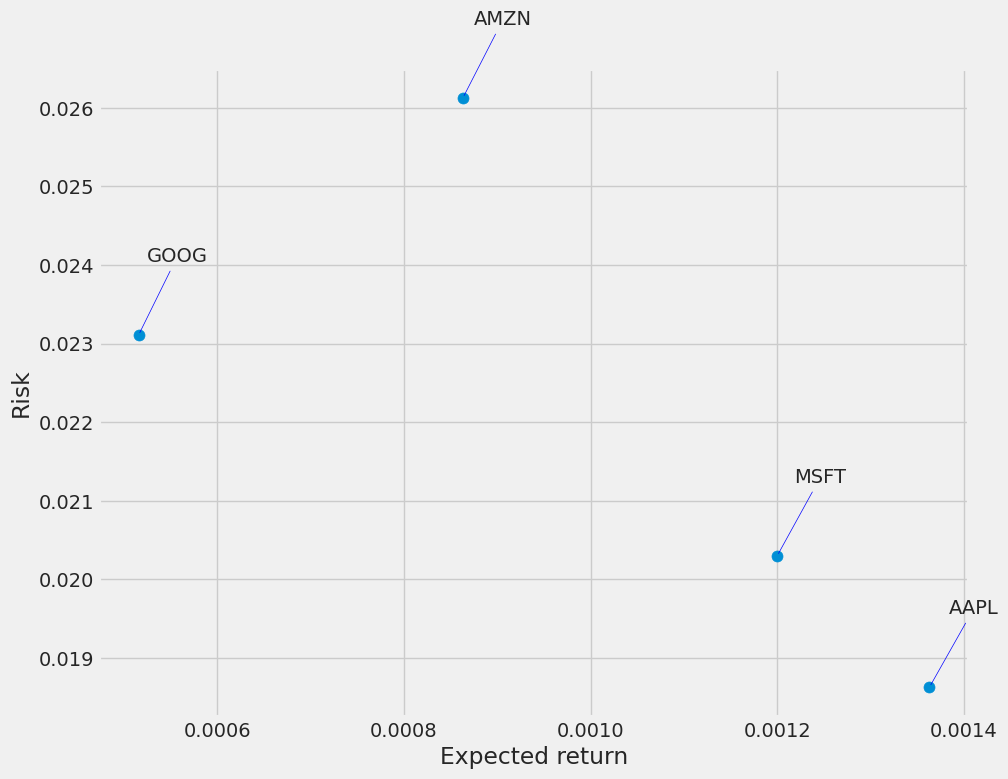

In [17]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize = (10,8))
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy = (x,y), xytext = (50,50), textcoords = 'offset points', ha = 'right', va = 'bottom', arrowprops = dict(arrowstyle = '-', color = 'blue', connectionstyle = 'arc,rad = -0.3'))

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start = '2012-01-01', end = datetime.now())
# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482927,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550010,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821993,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801652,394024400
...,...,...,...,...,...,...
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800
2023-06-29,189.080002,190.070007,188.940002,189.589996,189.589996,46347300
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.970001,85069600


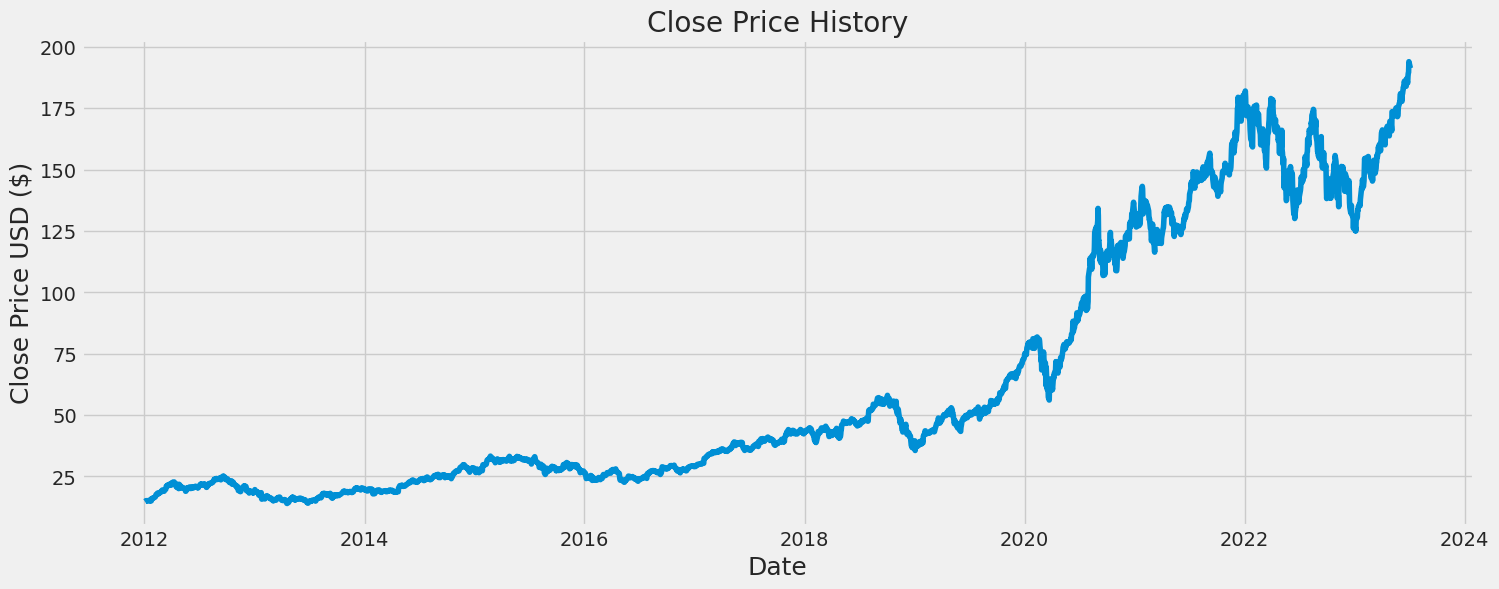

In [20]:
plt.figure(figsize = (16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)' ,fontsize = 18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset)*.95))

training_data_len

2750

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00410663],
       [0.00454506],
       [0.00545566],
       ...,
       [1.        ],
       [0.99161219],
       [0.98533517]])

In [25]:
# Creating the training dataset and the scaled training dataset
train_data = scaled_data[0:int(training_data_len), :]

#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00410663, 0.00454506, 0.00545566, 0.00632262, 0.0061897 ,
       0.00648927, 0.00635238, 0.00612225, 0.00580879, 0.00677891,
       0.00765381, 0.007384  , 0.005906  , 0.00731654, 0.00592783,
       0.01113551, 0.01073279, 0.01125851, 0.01239527, 0.01308368,
       0.01302615, 0.01281387, 0.01371852, 0.0145696 , 0.01553377,
       0.01709112, 0.02036253, 0.02041213, 0.02223333, 0.02359427,
       0.02125528, 0.02215596, 0.02213811, 0.02466359, 0.0243045 ,
       0.0249691 , 0.02616339, 0.026828  , 0.02874244, 0.0301371 ,
       0.03053983, 0.03068069, 0.02829607, 0.02772074, 0.02780605,
       0.03004784, 0.03067871, 0.0320337 , 0.03522774, 0.03948911,
       0.03869159, 0.03869357, 0.04177454, 0.04273871, 0.04205228,
       0.04142538, 0.04077268, 0.04294106, 0.04442897, 0.04505191])]
[0.043512415186967204]

[array([0.00410663, 0.00454506, 0.00545566, 0.00632262, 0.0061897 ,
       0.00648927, 0.00635238, 0.00612225, 0.00580879, 0.00677891,
       0.00765381, 0.007384  , 0.0

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs=1)

2690/2690 [==============================] - 108s 39ms/step - loss: 0.0012


In [28]:
# Create the testing data set
# Create a new array conntaining scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test= []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

5/5 [==============================] - 1s 33ms/step


5.4981072209145365

<ipython-input-29-c0acd1a24048>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


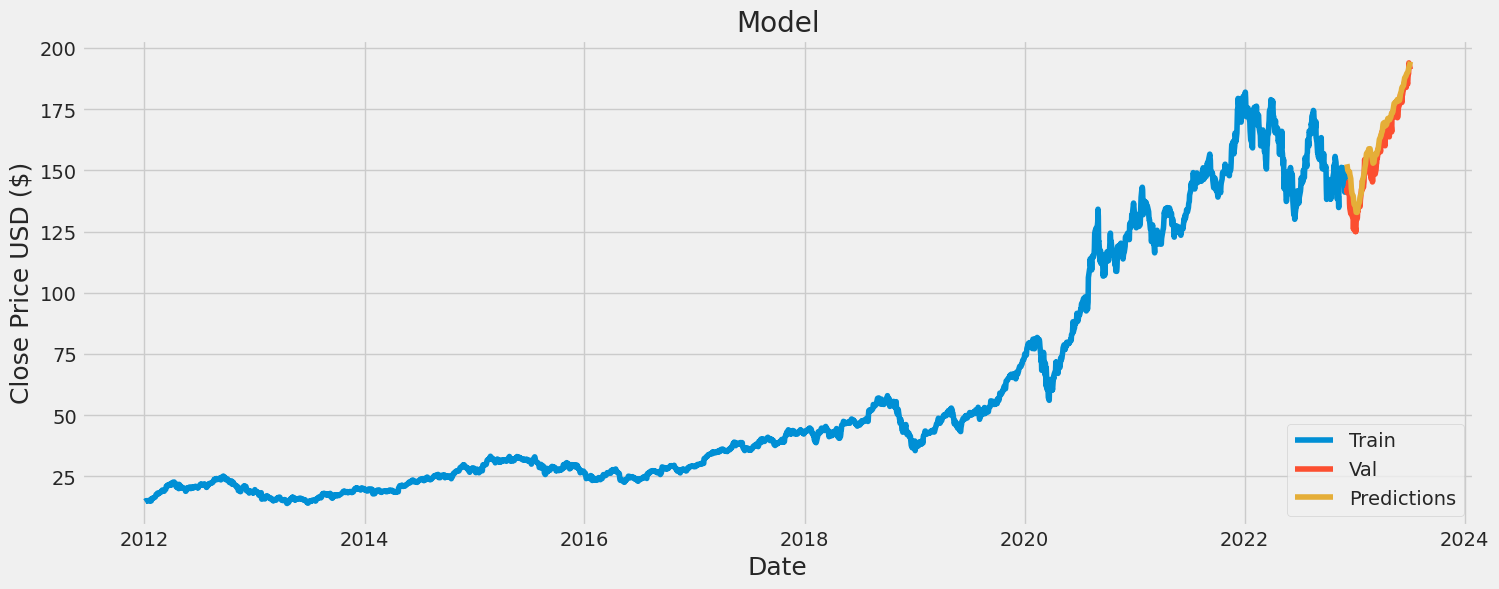

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualise the data
plt.figure(figsize = (16,6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [30]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-12-06,142.910004,152.568695
2022-12-07,140.940002,151.998505
2022-12-08,142.649994,150.955444
2022-12-09,142.160004,150.118759
2022-12-12,144.490005,149.406967
...,...,...
2023-06-28,189.250000,190.738144
2023-06-29,189.589996,191.410675
2023-06-30,193.970001,192.116486
